# Lead Scoring Study 

## A. Problem Statment 

1. Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads
2. Creating a model that can adjust according to company's requirements
    - When sales team is recruited and the team wants to contact all the leads that has good chances of conversion
    - When the sales team is involved in other project and will only call when there is a requirement 

#### Importing Revelant Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/mrbinit/Downloads/Leads.csv')

In [5]:
# checking the shape of dataframe 

df.shape

(9240, 37)

In [6]:
# observing the dataframe for the first time

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## B. Data Preperation and EDA

In [7]:
# checking for columns with 'select' field
# select is an option that was not selected during data entry

df.columns[df.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [8]:
# replacing 'Select' by nan in 'Specialization'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Select')

In [9]:
# replacing 'Select' by nan in 'How did you hear about X Education'

df['How did you hear about X Education'] = df['How did you hear about X Education'].replace(np.nan, 'Select')

In [10]:
# replacing 'Select' by nan in 'Lead Profile'

df['Lead Profile'] = df['Lead Profile'].replace(np.nan, 'Select')

In [11]:
#replacing 'Select' by nan in 'City'

df['City'] = df['City'].replace(np.nan, 'Select')

In [12]:
# checking the percentage of missing values 

round(df.isnull().sum()/len(df),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

#### Dropping rows with missing high percentage of missing values

- 'Lead Quality' is a metric based on the intution of the employee who has been assigned the lead. With high missing values it does not hold significance to the model we will create

In [13]:
# droppping 'Lead Quality'

df.drop('Lead Quality' , axis =1 , inplace = True)

#### Note

The following are metrics assigned to each customer based on their activity and profile. It does not hold high significance to understand their state with hot leads specially when they have high missing values
1. 'Asymmetrique Activity Index'
2. 'Asymmetrique Profile Index'
3. 'Asymmetrique Activity Score'
4. 'Asymmetrique Profile Score'

In [14]:
# dropping the above mentioned rows 

df.drop('Asymmetrique Activity Index' , axis =1 , inplace = True)

df.drop('Asymmetrique Profile Index' , axis =1 , inplace = True)

df.drop('Asymmetrique Activity Score' , axis =1 , inplace = True)

df.drop('Asymmetrique Profile Score' , axis =1 , inplace = True)

#### Note

- 'Country' has significant number of missing values and is not a important variable for the problem statement we have

In [15]:
# dropping 'Country'

df.drop('Country' , axis =1 , inplace = True)

In [16]:
# checking the percentage of missing values 

round(df.isnull().sum()/len(df),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [17]:
df.shape

(9240, 31)

#### Note

- 'What is your current occupation' , 'What matters most to you in choosing a course' and 'Tags' have might high number of missing values but they have important information for the problem statement. Doing some analysis on the same

In [18]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### Note

- The majority of information in 'What is your current occupation' does not have enough significance in the categorisation of hot leads. Between unemployed, workig professional and student it has most of the information. With high missing values this column is not significant enough. Thus dropping 'What is your current occupation'

In [19]:
# dropping 'What is your current occupation'

df.drop('What is your current occupation' , axis =1 , inplace = True)

In [20]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### Note

- 'What matters most to you in choosing a course' has most of its information as Better Career Prospects. Thus if we drop the column it will not make a lot of difference to the model

In [21]:
# dropping 'What matters most to you in choosing a course'

df.drop('What matters most to you in choosing a course' , axis =1 , inplace = True)

In [22]:
df['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

#### Note

- The information with large values in 'Tags' such as -Will revert after reading the email- have less significance in making with regards to our problem statement. We can drop this column 

In [23]:
# dropping 'Tags'

df.drop('Tags' , axis =1 , inplace = True)

In [24]:
# checking the missing values now 

round(df.isnull().sum()/len(df.index),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.01
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.01
Last Activity                               0.01
Specialization                              0.00
How did you hear about X Education          0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

#### Note

- We do not have significant missing values in the dataframe now. We can proceed to the next step. 

In [25]:
df.shape

(9240, 28)

#### Finding highly skewed columns

- Skewed columns are columns that have categorical values but are highly polarised in terms of their data

In [26]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [27]:
df['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [28]:
# dropping 'Do Not Call'

df.drop('Do Not Call', axis =1 , inplace = True)

In [29]:
df['Magazine'].value_counts()

Magazine
No    9240
Name: count, dtype: int64

In [30]:
# dropping 'Magazine'

df.drop('Magazine', axis=1 , inplace = True)

In [31]:
df['Search'].value_counts()

Search
No     9226
Yes      14
Name: count, dtype: int64

In [32]:
# dropping 'Search'

df.drop('Search' , axis =1, inplace =True)

In [33]:
df['Newspaper Article'].value_counts()

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [34]:
# dropping 'Newspaper Article'

df.drop('Newspaper Article', axis =1 , inplace = True)

In [35]:
df['X Education Forums'].value_counts()

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [36]:
# dropping 'X Education Forums'

df.drop('X Education Forums', axis =1 , inplace = True)

In [37]:
df['Newspaper'].value_counts()

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [38]:
# dropping 'Newspaper'

df.drop('Newspaper', axis=1 , inplace = True)

In [39]:
df['Digital Advertisement'].value_counts()

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [40]:
# dropping 'Digital Advertisement'

df.drop('Digital Advertisement', axis=1 , inplace = True)

In [41]:
df['Through Recommendations'].value_counts()

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

In [42]:
# dropping 'Through Recommendations'

df.drop('Through Recommendations', axis=1 , inplace = True)

In [43]:
df['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [44]:
# dropping 'Receive More Updates About Our Courses'

df.drop('Receive More Updates About Our Courses', axis=1 , inplace = True)

In [45]:
df['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [46]:
# dropping 'Update me on Supply Chain Content'

df.drop('Update me on Supply Chain Content', axis=1 , inplace = True)

In [47]:
df['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9240
Name: count, dtype: int64

In [48]:
# dropping 'Get updates on DM Content'

df.drop('Get updates on DM Content', axis=1 , inplace = True)

In [49]:
df['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [50]:
 # dropping 'I agree to pay the amount through cheque'

df.drop('I agree to pay the amount through cheque', axis=1 , inplace = True)

#### Note

- The other columns do not have skewed values in the dataframe and we can proceed to the next step

#### Checking for categorical columns with less percentage of rows

In [51]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [52]:
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [53]:
# putting the values with less than 100 occurences in one category - other

lis_ls = ['Facebook','bing','google','Click2call','Live Chat','Social Media','Press_Release','blog','Pay per Click Ads','welearnblog_Home','WeLearn','testone','NC_EDM','youtubechannel']

df['Lead Source'] = df['Lead Source'].apply(lambda x : 'Other_ls' if x in lis_ls else x)


In [54]:
df['Lead Source'].value_counts()

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other_ls              83
Name: count, dtype: int64

In [55]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [56]:
# putting the values with less than 100 occurences in one category - other

lis_ed = ['Advertisements','Social Media','Email','SMS']

df['How did you hear about X Education'] = df['How did you hear about X Education'].apply(lambda x : 'Other_ed' if x in lis_ed else x)

In [57]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Other_ed                  186
Multiple Sources          152
Name: count, dtype: int64

In [58]:
df['Lead Profile'].value_counts()

Lead Profile
Select                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [59]:
lis_lp = ['Lateral Student','Dual Specialization Student']

df['Lead Profile'] = df['Lead Profile'].apply(lambda x : 'Other_lp' if x in lis_lp else x)

In [60]:
df['Lead Profile'].value_counts()

Lead Profile
Select                   6855
Potential Lead           1613
Other Leads               487
Student of SomeSchool     241
Other_lp                   44
Name: count, dtype: int64

In [61]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [62]:
lis_la = ['Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow']

df['Last Activity'] = df['Last Activity'].apply(lambda x : 'Other_la' if x in lis_la else x)

In [63]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Other_la                      205
Form Submitted on Website     116
Name: count, dtype: int64

In [64]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [65]:
lis_na = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Resubscribed to emails','Email Received','Form Submitted on Website','View in browser link Clicked','Approached upfront']

df['Last Notable Activity'] = df['Last Notable Activity'].apply(lambda x : 'Other_na' if x in lis_na else x)

In [66]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_na                    160
Name: count, dtype: int64

In [67]:
round(df.isnull().sum()/len(df.index),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.01
Total Time Spent on Website               0.00
Page Views Per Visit                      0.01
Last Activity                             0.01
Specialization                            0.00
How did you hear about X Education        0.00
Lead Profile                              0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Removing any remaining null values

In [68]:
round(df.isnull().sum()/len(df.index),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.01
Total Time Spent on Website               0.00
Page Views Per Visit                      0.01
Last Activity                             0.01
Specialization                            0.00
How did you hear about X Education        0.00
Lead Profile                              0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [69]:
# dropping the null values in the remaiaining columns as their number is very small 

df.dropna(inplace = True)

In [70]:
# checking for the null variables 

round(df.isnull().sum()/len(df.index),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
How did you hear about X Education        0.0
Lead Profile                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [71]:
df.shape

(9074, 16)

In [72]:
#### Checking the percentage of the rows that are left

a = len(df.index)/9240
print(a)

0.982034632034632


In [73]:
# We have retainied more than 98 percentage of the rows after removing the null values 

#### Creating Dummies for all the categorical variables 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Specialization                          9074 non-null   object 
 

#### Variable One : Lead Origin

In [75]:
leadorigin_dummy = pd.get_dummies(df['Lead Origin'], drop_first = True)
leadorigin_dummy = leadorigin_dummy.astype(int)
leadorigin_dummy.head()

,Landing Page Submission,Lead Add Form,Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Variable Two : Lead Source

In [76]:
leadsource_dummy = pd.get_dummies(df['Lead Source'], drop_first = True)
leadsource_dummy = leadsource_dummy.astype(int)
leadsource_dummy.head()

,Google,Olark Chat,Organic Search,Other_ls,Reference,Referral Sites,Welingak Website
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0


#### Variable Three : Do Not Email

In [77]:
# creating a function to clearly mention the yes and its related variable

def email(x):
    if x == 'Yes':
        return 'yes_email'
    else:
        return 'no_email'

In [78]:

df['Do Not Email'] = df['Do Not Email'].apply(email)

In [79]:
donotemail_dummy = pd.get_dummies(df['Do Not Email'], drop_first = True)
donotemail_dummy = donotemail_dummy.astype(int)
donotemail_dummy.head()

,yes_email
0,0
1,0
2,0
3,0
4,0


#### Variable Four : Last Activity 

In [80]:
def sms(x):
    if x == 'SMS Sent':
        return 'sms_sent_la'
    if x == 'Olark Chat Conversation':
        return 'Olark_Chat_Conversation_la'
    else:
        return x

In [81]:
df['Last Activity'] = df['Last Activity'].apply(sms)

In [82]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                  3432
sms_sent_la                   2716
Olark_Chat_Conversation_la     972
Page Visited on Website        640
Converted to Lead              428
Email Bounced                  312
Email Link Clicked             267
Other_la                       191
Form Submitted on Website      116
Name: count, dtype: int64

In [83]:
lastactivity_dummy = pd.get_dummies(df['Last Activity'], drop_first = True)
lastactivity_dummy = lastactivity_dummy.astype(int)
lastactivity_dummy.head()

,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Olark_Chat_Conversation_la,Other_la,Page Visited on Website,sms_sent_la
0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0


#### Variable Five : Specialization 

In [84]:
df['Specialization'].value_counts()

Specialization
Select                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [85]:
def specs(x):
    if x == 'Select':
        return 'select_specs'
    else:
        return x

In [86]:
df['Specialization'] = df['Specialization'].apply(specs)

In [87]:
specialization_dummy = pd.get_dummies(df['Specialization'], drop_first = True)
specialization_dummy = specialization_dummy.astype(int)
specialization_dummy.head()

,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,select_specs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Variable Six : How did you hear about X Education

In [88]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   7086
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Other_ed                  185
Multiple Sources          152
Name: count, dtype: int64

In [89]:
def edu (x):
    if x == 'Student of SomeSchool':
        return 'edu_someschool'
    else:
        return x

In [90]:
df['How did you hear about X Education'] = df['How did you hear about X Education'].apply(edu)

In [91]:
education_dummy = pd.get_dummies(df['How did you hear about X Education'], drop_first = True)
education_dummy = education_dummy.astype(int)
education_dummy.head()

,Online Search,Other,Other_ed,Select,Word Of Mouth,edu_someschool
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


#### Variable Seven : Lead Profile

In [92]:
df['Lead Profile'].value_counts()

Lead Profile
Select                   6757
Potential Lead           1554
Other Leads               482
Student of SomeSchool     240
Other_lp                   41
Name: count, dtype: int64

In [93]:
def lp(x):
    if x == 'Select':
        return 'select_lp'
    elif x == 'Student of SomeSchool':
        return 'lp_someschool'
    else:
        return x

In [94]:
df['Lead Profile'] = df['Lead Profile'].apply(lp)

In [95]:
leadprofile_dummy = pd.get_dummies(df['Lead Profile'], drop_first = True)
leadprofile_dummy = leadprofile_dummy.astype(int)
leadprofile_dummy.head()

,Other_lp,Potential Lead,lp_someschool,select_lp
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


#### Variable Eight : City 

In [96]:
df['City'].value_counts()

City
Select                         3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

In [97]:
def city (x):
    if  x == 'Select':
        return 'select_city'
    else:
        return x

In [98]:
df['City'] = df['City'].apply(city)

In [99]:
city_dummy = pd.get_dummies(df['City'], drop_first = True)
city_dummy = city_dummy.astype(int)
city_dummy.head()

,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,select_city
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


#### Variable Nine : A free copy of Mastering The Interview

In [100]:
df['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6186
Yes    2888
Name: count, dtype: int64

In [101]:
# creating a function to clearly mention the yes and its related variable

def emails(x):
    if x == 'Yes':
        return 'yes_copy'
    else:
        return 'no_copy'

In [102]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(emails)

In [103]:
copy_dummy = pd.get_dummies(df['A free copy of Mastering The Interview'], drop_first = True)
copy_dummy = copy_dummy.astype(int)
copy_dummy.head()

,yes_copy
0,0
1,0
2,1
3,0
4,0


#### Variable Ten : Last Notable Activity

In [104]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_na                    158
Name: count, dtype: int64

In [105]:
activity_dummy = pd.get_dummies(df['Last Notable Activity'], drop_first = True)
activity_dummy = activity_dummy.astype(int)
activity_dummy.head()

,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [106]:
#### Putting all the dummy dataframe together 

final = pd.concat([df,leadorigin_dummy,leadsource_dummy,donotemail_dummy,lastactivity_dummy,specialization_dummy,education_dummy,leadprofile_dummy,city_dummy,copy_dummy,activity_dummy],axis =1)
final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Thane & Outskirts,Tier II Cities,select_city,yes_copy,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,no_email,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,no_email,0,5.0,674,2.5,Email Opened,...,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,no_email,1,2.0,1532,2.0,Email Opened,...,0,0,0,1,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,no_email,0,1.0,305,1.0,Other_la,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,no_email,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,1,0,0,0,0


In [107]:
# dropping all the related variables after creating the dummies 

final = final.drop('Lead Origin',axis =1)
final = final.drop('Lead Source',axis =1)
final = final.drop('Do Not Email',axis =1)
final = final.drop('Last Activity',axis =1)
final = final.drop('Specialization',axis =1)
final = final.drop('How did you hear about X Education',axis =1)
final = final.drop('Lead Profile',axis =1)
final = final.drop('City',axis =1)
final = final.drop('A free copy of Mastering The Interview',axis =1)
final = final.drop('Last Notable Activity',axis =1)

In [108]:
final.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Google,...,Thane & Outskirts,Tier II Cities,select_city,yes_copy,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## C. Dividing into train test data

In [109]:
# importing relevant libraries 

import sklearn
from sklearn.model_selection import train_test_split

In [110]:
final_train, final_test = train_test_split(final, train_size = 0.7, random_state = 100)

print(final_train.shape)
print(final_test.shape)

(6351, 66)
(2723, 66)


## D. Performing scaling on continuous variables 

In [111]:
# we are using the min max scaler for rescaling 

In [112]:
#importing relevant packages 

from sklearn.preprocessing import MinMaxScaler

In [113]:
# Instiating scaler object 

scaler = MinMaxScaler()

In [114]:
# creating a list of numeric variables 

numeric = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [115]:
final_train[numeric] = scaler.fit_transform(final_train[numeric])

In [116]:
final_train.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Google,...,Thane & Outskirts,Tier II Cities,select_city,yes_copy,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
3009,42a4d521-df88-4b5a-b198-50594a407a2d,630949,0,0.007968,0.178347,0.083333,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1012,4594be86-3b2e-4b55-866b-5a4b05ffd0f6,649355,0,0.007968,0.085355,0.083333,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,0,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4750,9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,614238,1,0.007968,0.619946,0.083333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,b0bfbc32-bd4a-4376-a829-5318bc0e9547,588625,1,0.019920,0.711590,0.104167,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## E. Creating the test train split 

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x = final.drop(['Prospect ID','Lead Number','Converted'], axis =1)

In [119]:
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other_ls,...,Thane & Outskirts,Tier II Cities,select_city,yes_copy,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [120]:
y = final['Converted']

In [121]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [123]:
# calculating the conversion rate

conversion = sum(final['Converted'])/len(final['Converted'].index)
conversion

0.3785541106458012

- We have a converstion rate of 37.86 percentage 

## F. Building the first model

In [124]:
import statsmodels.api as sm

In [125]:
model = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2456.8
Date:                Thu, 10 Aug 2023   Deviance:                       4913.5
Time:                        23:05:25   Pearson chi2:                 6.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4284
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4859      0.674     -3.691      0.000      -3.806      -1.166
TotalVisits                     0.0328      0.010      3.379      0.001       0.014       0.052
Total Time Spent on Website     0.0020   7.77e-05     26.349      0.000       0.002       0.002
Page Views Per Visit           -0.0579      0.026     -2.253      0.024      -0.108      -0.008
Landing Page Submission        -0.6610      0.167     -3.955      0.000      -0.989      -0.333
Lead Add Form                   0.9057      1.016      0.891      0.373      -1.086       2.897
Lead Import                     0.8318      0.813      1.024      0.306      -0.761       2.425
Google                          0.2617      0.127      2.053      0.040       0.012       0.512
Olark Chat                      1.3503      0.172      7.851      0.000       1.013       1.687
Organic Search                  0.1065      0.136      0.785      0.433      -0.160       0.373
Other_ls                        0.2093      0.640      0.327      0.743      -1.044       1.463
Reference                       2.4062      1.043      2.307      0.021       0.362       4.451
Referral Sites                  0.1360      0.344      0.395      0.693      -0.539       0.811
Welingak Website                5.1993      1.253      4.150      0.000       2.744       7.655
yes_email                      -1.6399      0.217     -7.562      0.000      -2.065      -1.215
Email Bounced                  -0.1297      0.515     -0.252      0.801      -1.139       0.880
Email Link Clicked              0.3080      0.471      0.654      0.513      -0.615       1.231
Email Opened                    0.8137      0.255      3.190      0.001       0.314       1.314
Form Submitted on Website       0.4252      0.403      1.054      0.292      -0.366       1.216
Olark_Chat_Conversation_la     -0.4985      0.287     -1.738      0.082      -1.061       0.064
Other_la                        1.2720      0.378      3.368      0.001       0.532       2.012
Page Visited on Website         0.6664      0.303      2.200      0.028       0.073       1.260
sms_sent_la                     1.3206      0.258      5.122      0.000       0.815       1.826
Business Administration        -0.2397      0.252     -0.953      0.341      -0.733       0.253
E-Business                      0.1462      0.483      0.303      0.762      -0.801       1.093
E-COMMERCE                      0.0378      0.381      0.099      0.921      -0.710       0.785
Finance Management             -0.0082      0.214     -0.039      0.969      -0.427       0.411
Healthcare Management          -0.1063      0.321     -0.332      0.740      -0.735       0.522
Hospitality Management         -0.3727      0.378     -0.985      0.325      -1.114       0.369
Human Resou

## G. Selecting the Variables with RFE

In [126]:
# importing relevant libraries 

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

In [127]:
# running Recursive Feature Elimination (RFE) 

from sklearn.feature_selection import RFE 
rfe = RFE(estimator=logreg, n_features_to_select = 10)

rfe = rfe.fit(x_train, y_train)

In [128]:
# creating a list of all the variables and their RFE rankings 

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 52),
 ('Page Views Per Visit', False, 43),
 ('Landing Page Submission', False, 2),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 47),
 ('Google', False, 28),
 ('Olark Chat', False, 38),
 ('Organic Search', False, 39),
 ('Other_ls', False, 9),
 ('Reference', False, 24),
 ('Referral Sites', False, 42),
 ('Welingak Website', True, 1),
 ('yes_email', True, 1),
 ('Email Bounced', False, 17),
 ('Email Link Clicked', False, 48),
 ('Email Opened', False, 7),
 ('Form Submitted on Website', False, 53),
 ('Olark_Chat_Conversation_la', True, 1),
 ('Other_la', False, 5),
 ('Page Visited on Website', False, 8),
 ('sms_sent_la', False, 6),
 ('Business Administration', False, 27),
 ('E-Business', False, 20),
 ('E-COMMERCE', False, 18),
 ('Finance Management', False, 51),
 ('Healthcare Management', False, 41),
 ('Hospitality Management', False, 49),
 ('Human Resource Management', False, 40),
 ('IT Projects Management', False, 5

In [129]:
# storing the selected columns in col

col = x_train.columns[rfe.support_]

In [130]:
x_train[col].head()

,Lead Add Form,Welingak Website,yes_email,Olark_Chat_Conversation_la,select_specs,Other_lp,Potential Lead,lp_someschool,Other_na,SMS Sent
3009,0,0,0,0,0,0,0,0,0,0
1012,0,0,1,0,1,0,0,0,1,0
9226,0,0,0,0,1,0,0,0,0,0
4750,0,0,0,0,0,0,0,0,0,1
7987,0,0,0,0,0,0,0,0,0,0


In [131]:
# chekcking the selected columns 

x_train.columns[rfe.support_]

Index(['Lead Add Form', 'Welingak Website', 'yes_email',
       'Olark_Chat_Conversation_la', 'select_specs', 'Other_lp',
       'Potential Lead', 'lp_someschool', 'Other_na', 'SMS Sent'],
      dtype='object')

## H. Building the Model Based on the selected variables 

In [132]:
# creating the model 

x_train_sm = sm.add_constant(x_train[col])
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
model_one.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3006.8
Date:                Thu, 10 Aug 2023   Deviance:                       6013.5
Time:                        23:05:29   Pearson chi2:                 6.50e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3204
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.1447      0.049    -23.161      0.000      -1.242      -1.048
Lead Add Form                  2.4136      0.220     10.955      0.000       1.982       2.845
Welingak Website               2.5322      0.760      3.334      0.001       1.044       4.021
yes_email                     -1.9794      0.177    -11.199      0.000      -2.326      -1.633
Olark_Chat_Conversation_la    -1.1499      0.151     -7.602      0.000      -1.446      -0.853
select_specs                  -0.2456      0.072     -3.431      0.001      -0.386      -0.105
Other_lp                      24.3875   1.41e+04      0.002      0.999   -2.77e+04    2.77e+04
Potential Lead                 1.9678      0.091     21.661      0.000       1.790       2.146
lp_someschool                 -1.9617      0.462     -4.242      0.000      -2.868      -1.055
Other_na                       1.7456      0.256      6.808      0.000       1.243       2.248
SMS Sent                       1.7281      0.073     23.559      0.000       1.584       1.872
==============================================================================================
"""

In [133]:
# importing relevant libraries 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train[col].columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train[col].values,i) for i in range (x_train[col].shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
0,Lead Add Form,1.52
4,select_specs,1.44
1,Welingak Website,1.36
3,Olark_Chat_Conversation_la,1.30
6,Potential Lead,1.22
9,SMS Sent,1.19
2,yes_email,1.15
8,Other_na,1.12
7,lp_someschool,1.02
5,Other_lp,1.00


In [135]:
# 'other_lp' has a very low significance based on the p-value

In [136]:
new = x_train[col]

In [137]:
new.drop('Other_lp', axis = 1, inplace = True)

In [138]:
# creating the model after dropping 'Other_lp'

x_train_sm = sm.add_constant(new)
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
pred = model_one.fit()
pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3038.9
Date:                Thu, 10 Aug 2023   Deviance:                       6077.9
Time:                        23:05:29   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3134
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.1108      0.049    -22.738      0.000      -1.207      -1.015
Lead Add Form                  2.4192      0.220     11.012      0.000       1.989       2.850
Welingak Website               2.5202      0.759      3.322      0.001       1.034       4.007
yes_email                     -1.9449      0.173    -11.214      0.000      -2.285      -1.605
Olark_Chat_Conversation_la    -1.1625      0.151     -7.697      0.000      -1.458      -0.866
select_specs                  -0.2667      0.071     -3.745      0.000      -0.406      -0.127
Potential Lead                 1.9388      0.091     21.398      0.000       1.761       2.116
lp_someschool                 -1.9898      0.463     -4.302      0.000      -2.896      -1.083
Other_na                       1.7012      0.255      6.680      0.000       1.202       2.200
SMS Sent                       1.7108      0.073     23.419      0.000       1.568       1.854
==============================================================================================
"""

In [139]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = new.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(new.values,i) for i in range (new.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
0,Lead Add Form,1.52
4,select_specs,1.44
1,Welingak Website,1.36
3,Olark_Chat_Conversation_la,1.30
5,Potential Lead,1.22
8,SMS Sent,1.19
2,yes_email,1.14
7,Other_na,1.12
6,lp_someschool,1.02


In [140]:
# Getting the predicted values on the train set
y_train_pred = pred.predict(x_train_sm)
y_train_pred[:10]

3009    0.247715
1012    0.165043
9226    0.201409
4750    0.645645
7987    0.247715
1281    0.645645
2880    0.247715
4971    0.645645
7536    0.247715
1248    0.247715
dtype: float64

In [141]:
y_train_pred = y_train_pred.values.reshape(-1)


In [142]:
y_train_pred[:10]

array([0.24771466, 0.16504272, 0.20140884, 0.64564454, 0.24771466,
       0.64564454, 0.24771466, 0.64564454, 0.24771466, 0.24771466])

In [143]:
# creating the columns 'Convert' and 'Convert_prob' for the dataframe y_train_final
y_train_final = pd.DataFrame({'Convert' : y_train.values, 'Converted_prob' : y_train_pred})
y_train_final

,Convert,Converted_prob
0,0,0.247715
1,0,0.165043
2,0,0.201409
3,1,0.645645
4,1,0.247715
...,...,...
6346,0,0.201409
6347,1,0.695922
6348,0,0.940050
6349,0,0.247715


In [144]:
# creating a column 'Lead_Number' for the datframe y_train_final
y_train_final['Lead_Number'] = final['Lead Number']
y_train_final.head(10
                   )

,Convert,Converted_prob,Lead_Number
0,0,0.247715,660737.0
1,0,0.165043,660728.0
2,0,0.201409,660727.0
3,1,0.645645,660719.0
4,1,0.247715,660681.0
5,1,0.645645,660680.0
6,0,0.247715,660673.0
7,1,0.645645,660664.0
8,1,0.247715,660624.0
9,0,0.247715,660616.0


In [145]:
# creating a column predicted with the cutoff at 0.5
y_train_final['predicted'] = y_train_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_final.head(10)

,Convert,Converted_prob,Lead_Number,predicted
0,0,0.247715,660737.0,0
1,0,0.165043,660728.0,0
2,0,0.201409,660727.0,0
3,1,0.645645,660719.0,1
4,1,0.247715,660681.0,0
5,1,0.645645,660680.0,1
6,0,0.247715,660673.0,0
7,1,0.645645,660664.0,1
8,1,0.247715,660624.0,0
9,0,0.247715,660616.0,0


In [146]:
# calculating the score and storing the information in the column 'score'
y_train_final['score'] = round(y_train_final['Converted_prob']* 100, 0)
y_train_final.head(10)

,Convert,Converted_prob,Lead_Number,predicted,score
0,0,0.247715,660737.0,0,25.0
1,0,0.165043,660728.0,0,17.0
2,0,0.201409,660727.0,0,20.0
3,1,0.645645,660719.0,1,65.0
4,1,0.247715,660681.0,0,25.0
5,1,0.645645,660680.0,1,65.0
6,0,0.247715,660673.0,0,25.0
7,1,0.645645,660664.0,1,65.0
8,1,0.247715,660624.0,0,25.0
9,0,0.247715,660616.0,0,25.0


### Model Evaluation

In [147]:
from sklearn import metrics 

In [148]:
# creating the confusion matrix 
confusion = metrics.confusion_matrix(y_train_final.Convert, y_train_final.predicted)
confusion

array([[3325,  580],
       [ 735, 1711]])

In [149]:
print(metrics.accuracy_score(y_train_final.Convert, y_train_final.predicted))

0.7929459927570461


### Checking further

In [150]:
# true positives
tp = confusion[1,1] 

#true negatives
tn = confusion[0,0]

# false positives
fp = confusion[0,1]

# false negatives
fn = confusion[1,0]

In [151]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sensitivity can also be termed as true positive rate 
tp / (tp + fn)

0.6995094031071136

In [152]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 
tn / (tn + fp)

0.8514724711907811

In [153]:
 # false positive rate : A measure of how many 0s were predicted as 1 
fp / (tn + fp)

0.14852752880921896

### Checking ROC curve

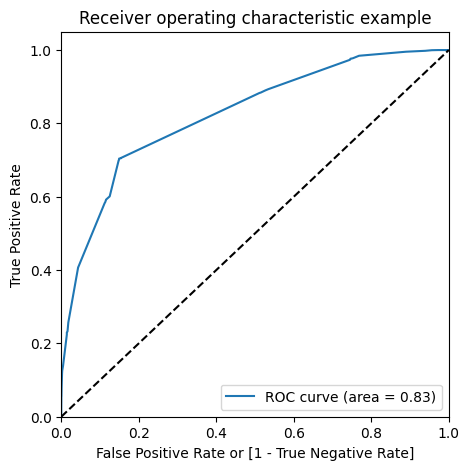

In [154]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final.Convert, y_train_final.Converted_prob)

### Finding optimal cutoff Point 

In [155]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i]= y_train_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_final.head()

,Convert,Converted_prob,Lead_Number,predicted,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.247715,660737.0,0,25.0,1,1,1,0,0,0,0,0,0,0
1,0,0.165043,660728.0,0,17.0,1,1,0,0,0,0,0,0,0,0
2,0,0.201409,660727.0,0,20.0,1,1,1,0,0,0,0,0,0,0
3,1,0.645645,660719.0,1,65.0,1,1,1,1,1,1,1,0,0,0
4,1,0.247715,660681.0,0,25.0,1,1,1,0,0,0,0,0,0,0


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.Convert, y_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.528893  0.977514  0.247887
0.2   0.2  0.531727  0.973426  0.255058
0.3   0.3  0.791844  0.705233  0.846095
0.4   0.4  0.794206  0.704007  0.850704
0.5   0.5  0.792946  0.699509  0.851472
0.6   0.6  0.769485  0.600981  0.875032
0.7   0.7  0.702724  0.257155  0.981818
0.8   0.8  0.694851  0.233442  0.983867
0.9   0.9  0.694536  0.232216  0.984123


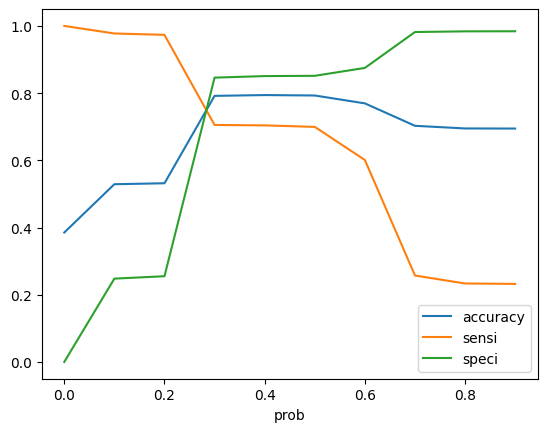

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [158]:
y_train_final['final_predicted'] = y_train_final.Converted_prob.map(lambda x : 1 if x > 0.3 else 0)
y_train_final.head()

,Convert,Converted_prob,Lead_Number,predicted,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.247715,660737.0,0,25.0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.165043,660728.0,0,17.0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.201409,660727.0,0,20.0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.645645,660719.0,1,65.0,1,1,1,1,1,1,1,0,0,0,1
4,1,0.247715,660681.0,0,25.0,1,1,1,0,0,0,0,0,0,0,0


### lead source assign

In [160]:
y_train_final["Lead_Score"] = y_train_final.Converted_prob.map(lambda x : round(x * 100))
y_train_final.head(10)

,Convert,Converted_prob,Lead_Number,predicted,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.247715,660737.0,0,25.0,1,1,1,0,0,0,0,0,0,0,0,25
1,0,0.165043,660728.0,0,17.0,1,1,0,0,0,0,0,0,0,0,0,17
2,0,0.201409,660727.0,0,20.0,1,1,1,0,0,0,0,0,0,0,0,20
3,1,0.645645,660719.0,1,65.0,1,1,1,1,1,1,1,0,0,0,1,65
4,1,0.247715,660681.0,0,25.0,1,1,1,0,0,0,0,0,0,0,0,25
5,1,0.645645,660680.0,1,65.0,1,1,1,1,1,1,1,0,0,0,1,65
6,0,0.247715,660673.0,0,25.0,1,1,1,0,0,0,0,0,0,0,0,25
7,1,0.645645,660664.0,1,65.0,1,1,1,1,1,1,1,0,0,0,1,65
8,1,0.247715,660624.0,0,25.0,1,1,1,0,0,0,0,0,0,0,0,25
9,0,0.247715,660616.0,0,25.0,1,1,1,0,0,0,0,0,0,0,0,25
